# A 1 is coded as being extremely reasonable here!!! - I have since flipped this

For a number of questions there were words that were repeated and you were asked to give these the same score. You did not give the same score for a number of these identical words which suggests you were not focusing on the task and makes your survey results unusable.

### For 3 the indices of the answer_orders are: 0, 6, 11, 15, 17

In [1]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

In [2]:
answer_orders1 = pickle.load(open('MTURK_FIRST_' + 'updated_answers_list.pickle','rb'))
answer_orders2 = pickle.load(open('MTURK_QUESTIONS_TWO_' + '_answers_list.pickle','rb'))

In [3]:
mturk1 = pd.read_csv('Tail+Free+Sampling+Survey_October+17%2C+2019_07.33.zip')
mturk2 = pd.read_csv('Tail+Free+Sampling+Survey+2_October+20%2C+2019_19.47.zip')#'Tail+Free+Sampling+Survey_October+16%2C+2019_07.21.zip')

In [4]:
mturk1.shape

(23, 126)

In [5]:
mturk2.shape

(20, 124)

In [6]:
mturk1.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q20,Random ID,Q22 - Parent Topics,Q22 - Topics
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",Thank you very much for completing this survey...,Random ID,Q22 - Parent Topics,Q22 - Topics
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID21_2""}","{""ImportId"":""QID21_3""}","{""ImportId"":""QID21_4""}","{""ImportId"":""QID21_5""}","{""ImportId"":""QID21_6""}","{""ImportId"":""QID21_7""}","{""ImportId"":""QID26_TEXT""}","{""ImportId"":""Random ID""}","{""ImportId"":""QID26_TEXT_c25db21136a8433bb1f4d1...","{""ImportId"":""QID26_TEXT_c25db21136a8433bb1f4d1..."
2,2019-10-15 21:35:00,2019-10-15 21:35:13,1,NaN,100,13,1,2019-10-15 21:35:14,R_2X6WbTrQRtVcuAK,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40022,NaN,NaN
3,2019-10-15 22:03:30,2019-10-15 22:08:53,0,107.145.113.42,100,322,1,2019-10-15 22:08:54,R_1KiQLFb92Exgwjx,NaN,...,1,2,5,4,1,1,NaN,99887,NaN,NaN
4,2019-10-15 22:18:07,2019-10-15 22:32:26,0,171.49.170.27,100,858,1,2019-10-15 22:32:26,R_3JjTvGYtgJEC5hD,NaN,...,3,3,2,4,5,2,i like to do this type of work in future,52503,NaN,Unknown


In [7]:
mturk2.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q18_7,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q20,Random ID
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,"“Ah yes, the obvious question. It would seem t...",The fact of the matter is that _______ - the,The fact of the matter is that _______ - there,The fact of the matter is that _______ - EVA,The fact of the matter is that _______ - people,The fact of the matter is that _______ - it,The fact of the matter is that _______ - this,The fact of the matter is that _______ - in,Thank you very much for completing this survey...,Random ID
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID20_7""}","{""ImportId"":""QID21_1""}","{""ImportId"":""QID21_2""}","{""ImportId"":""QID21_3""}","{""ImportId"":""QID21_4""}","{""ImportId"":""QID21_5""}","{""ImportId"":""QID21_6""}","{""ImportId"":""QID21_7""}","{""ImportId"":""QID26_TEXT""}","{""ImportId"":""Random ID""}"
2,2019-10-17 12:30:23,2019-10-17 12:43:04,0,152.3.43.42,100,761,1,2019-10-17 12:43:05,R_x44zIuJGYqCTeUN,NaN,...,2,1,1,4,3,1,2,1,lots of upper case words - From Trenton,89534
3,2019-10-17 13:06:27,2019-10-17 13:12:05,0,66.91.211.85,100,338,1,2019-10-17 13:12:06,R_511N5bNwxQOSrMB,NaN,...,3,1,2,5,4,2,1,4,No,26967
4,2019-10-17 13:04:10,2019-10-17 13:12:17,0,24.116.21.131,100,487,1,2019-10-17 13:12:18,R_RxbLDvDSxHkb2PT,NaN,...,2,1,1,5,1,1,1,1,no,12285


In [8]:
qstart = 'Q5_1'
qend = 'Q19_7'

In [9]:
reverse_encoding_dict = {k:v for k, v in zip(np.arange(1,6,1), np.arange(5,0,-1))}
reverse_encoding_dict

{1: 5, 2: 4, 3: 3, 4: 2, 5: 1}

In [10]:
mturk1.drop([0,1,2], axis=0, inplace=True)# dropping the first null response and the header details
mturk2.drop([0,1], axis=0, inplace=True)# dropping the first null response and the header details

In [11]:
mturk1_len = mturk1.shape[0]

In [12]:
mturk = mturk1.append( mturk2, sort=False)

In [13]:
mturk.reset_index(inplace=True)

In [14]:
mturk.loc[:, qstart:qend] = mturk.loc[:, qstart:qend].apply(lambda x: x.astype(int).map(reverse_encoding_dict))

In [15]:
mturk.head()

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q20,Random ID,Q22 - Parent Topics,Q22 - Topics
0,3,2019-10-15 22:03:30,2019-10-15 22:08:53,0,107.145.113.42,100,322,1,2019-10-15 22:08:54,R_1KiQLFb92Exgwjx,...,5,4,1,2,5,5,NaN,99887,NaN,NaN
1,4,2019-10-15 22:18:07,2019-10-15 22:32:26,0,171.49.170.27,100,858,1,2019-10-15 22:32:26,R_3JjTvGYtgJEC5hD,...,3,3,4,2,1,4,i like to do this type of work in future,52503,NaN,Unknown
2,5,2019-10-15 22:48:54,2019-10-15 23:00:41,0,75.142.251.193,100,707,1,2019-10-15 23:00:42,R_2cuydCFibv8JRva,...,5,5,3,5,5,5,Thank you,56916,NaN,Unknown
3,6,2019-10-15 22:51:26,2019-10-15 23:01:15,0,157.46.79.62,100,588,1,2019-10-15 23:01:15,R_3PzZBVyiobpkdjr,...,1,2,4,5,3,3,A22CN9X0JP1HM4,92914,NaN,Unknown
4,7,2019-10-15 22:59:44,2019-10-15 23:19:12,0,49.207.137.2,100,1167,1,2019-10-15 23:19:12,R_2Pcjs6Du7ICHJ0G,...,4,3,2,5,3,1,NICE,64874,NaN,Unknown


In [16]:
mturk.shape

(38, 127)

In [17]:
np.asarray(mturk.columns.tolist())

array(['index', 'StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q5_1', 'Q5_2', 'Q5_3',
       'Q5_4', 'Q5_5', 'Q5_6', 'Q5_7', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4',
       'Q6_5', 'Q6_6', 'Q6_7', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5',
       'Q7_6', 'Q7_7', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6',
       'Q8_7', 'Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7',
       'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7',
       'Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q11_7',
       'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7',
       'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7',
       'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7',
       'Q1

In [18]:
mturk['Duration (in seconds)']= mturk['Duration (in seconds)'].astype(int)/60

In [19]:
qas = mturk.loc[:, qstart:qend]
qas;

In [20]:
answer_orders1 = answer_orders1[0:15]
answer_orders2 = answer_orders2[0:15]

In [21]:
qas.head()

,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q6_1,Q6_2,Q6_3,...,Q18_5,Q18_6,Q18_7,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7
0,3,4,1,5,5,5,1,1,3,3,...,3,4,1,1,5,4,1,2,5,5
1,2,4,5,3,2,4,5,5,2,3,...,3,5,1,4,3,3,4,2,1,4
2,3,4,4,5,4,5,3,3,5,5,...,5,5,3,5,5,5,3,5,5,5
3,4,5,2,3,4,1,3,3,1,4,...,3,5,2,3,1,2,4,5,3,3
4,1,5,2,4,3,1,2,4,3,1,...,2,5,2,3,4,3,2,5,3,1


In [22]:
qas.shape

(38, 105)

In [23]:
to_df = []

for user_ind in range(qas.shape[0]):
    
    user_ans = qas.loc[user_ind, :]
    
    if user_ind < mturk1_len:
        rel_ans = answer_orders1
        turk_v = 1
    else:
        rel_ans = answer_orders2
        turk_v = 2
    
    for answer_ind, quest in enumerate(rel_ans): 
        
        for q_ind, q in enumerate(quest): 
            abs_ind = answer_ind*len(quest)+q_ind
            #print(abs_ind)
            to_df.append([user_ind, turk_v, answer_ind, q[0].strip(), q[2], q[1], user_ans[abs_ind] ])
res = pd.DataFrame(to_df, columns=['user_ind', 'turk_v', 'q_ind', 'word', 'ground_word', 'prob', 'score'])

In [24]:
res.head()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
0,0,1,0,event,0,0.002131,3
1,0,1,0,things,0,0.000778,4
2,0,1,0,bad,0,0.000492,1
3,0,1,0,events,1,0.978269,5
4,0,1,0,circumstances,0,0.000509,5


In [25]:
res.tail()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
3985,37,2,14,EVA,0,1.928819e-11,4
3986,37,2,14,people,1,1.442596e-02,5
3987,37,2,14,it,0,2.908443e-02,5
3988,37,2,14,this,0,3.677039e-02,4
3989,37,2,14,in,0,2.545756e-02,4


In [26]:
from importlib import reload
import utils

reload(utils)
from utils import *

In [27]:
res['score'] = res['score'].astype(int)

In [28]:
res['score'] = res['score']*2

# Looking at the global results without any cleaning

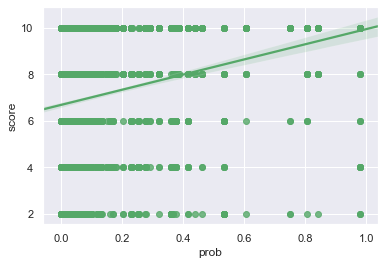

In [29]:
# put a linear regression through this. 

import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=res['prob'], y=res['score'], color="g")


Text(0, 0.5, 'Score')

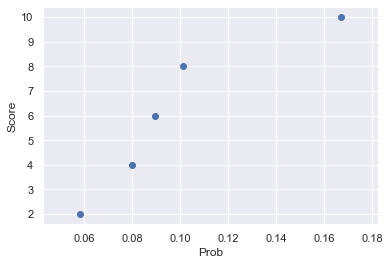

In [30]:
means = res.groupby('score').mean()
plt.scatter(means['prob'], means.index)
plt.xlabel('Prob')
plt.ylabel('Score')

In [31]:
mturk[['LocationLatitude',
 'LocationLongitude', 'Q20', 'Random ID', 'Duration (in seconds)']]

,LocationLatitude,LocationLongitude,Q20,Random ID,Duration (in seconds)
0,28.206207275390625,-80.68740081787109375,NaN,99887,5.366667
1,13.087799072265625,80.27850341796875,i like to do this type of work in future,52503,14.300000
2,39.5272064208984375,-119.91290283203125,Thank you,56916,11.783333
3,13.087799072265625,80.27850341796875,A22CN9X0JP1HM4,92914,9.800000
4,13.087799072265625,80.27850341796875,NICE,64874,19.450000
5,29.691802978515625,-95.6526031494140625,No comments,79189,6.000000
6,37.675201416015625,-120.946502685546875,no,96192,16.800000
7,13.087799072265625,80.27850341796875,A3PWNN3ITRK4X3,75978,7.316667
8,13.087799072265625,80.27850341796875,A3HZEWILX5PQSJ,26893,16.050000
9,13.087799072265625,80.27850341796875,IT IS INFORMATIVE,18522,27.416667


In [32]:
mturk.iloc[24]['Q20']

'Slightly confused that the sentences were not complete. I tried to imagine all possibilities for how the sentenced could be written'

# What surveyors should I pay?

## What is the correlation matrix between them? 

In [33]:
user_vectors = []
for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]['score'].astype(int)
    # normalize to the unit vector
    #print(np.dot(single_u,single_u))
    single_u = single_u/ np.sqrt(np.dot(single_u,single_u))
    #print(np.sqrt(np.dot(single_u,single_u)))
    user_vectors.append(single_u)
user_vectors = np.asarray(user_vectors) # each user is a row

In [34]:
u_corr = np.corrcoef(user_vectors)
u_corr;

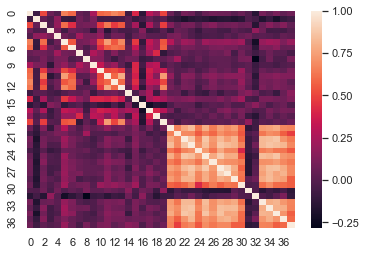

In [35]:
sns.heatmap(u_corr)

2, 5 and 6 all correlate well. This is the same as those that have high internal consistency (and also happen to give the highest scores). 6 is from Sacramento. 5 is from Houston. 2 is outside of Sacramento. 0 is from palm bay florida. and was almost internally consistent enough. correlated well with some of the others. 

## Looking at the scores from each one: 

In [36]:
'''for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]
    print('user ind:', user_ind)
    #overall output
    plt.scatter(single_u['prob'], single_u['score'])
    plt.xlabel('Prob')
    plt.ylabel('Score')
    plt.show()
    #mean output
    means = single_u.groupby('score').mean()
    plt.scatter(means['prob'], means.index)
    plt.xlabel('Prob')
    plt.ylabel('Score')
    plt.show()
    #did they get the same words with the same score? 
'''

"for user_ind in res['user_ind'].unique().tolist():\n    single_u = res[res['user_ind']==user_ind]\n    print('user ind:', user_ind)\n    #overall output\n    plt.scatter(single_u['prob'], single_u['score'])\n    plt.xlabel('Prob')\n    plt.ylabel('Score')\n    plt.show()\n    #mean output\n    means = single_u.groupby('score').mean()\n    plt.scatter(means['prob'], means.index)\n    plt.xlabel('Prob')\n    plt.ylabel('Score')\n    plt.show()\n    #did they get the same words with the same score? \n"

In [168]:
perc_const_threshold = 0.9

def dup_in_col(x):
    dupe_mask = x['word'].duplicated(keep=False)
    dupe_words = x['word'][dupe_mask]
    #print(dupe_words)
    for w in dupe_words.unique().tolist():
        same_prob = len(x[x['word']==w]['score'].unique().tolist())==1
        #print(x[x['word']==w]['score'])
        #print('same score', same_prob)
        if same_prob: 
            continue
        else: 
            return False
    return True

bad_users = []

for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]
    same_probs = single_u.groupby('q_ind').apply(dup_in_col )
    int_cons = same_probs.sum() == len(same_probs)
    perc_int_cons = same_probs.sum()/len(same_probs)
    
    print('user ind', user_ind, '| internal consistent?', int_cons, '| percent int con', perc_int_cons)
    
    if perc_int_cons< perc_const_threshold:
        bad_users.append(user_ind)
print('bad users are: ', bad_users)

user ind 0 | internal consistent? False | percent int con 0.8666666666666667
user ind 1 | internal consistent? False | percent int con 0.6
user ind 2 | internal consistent? False | percent int con 0.9333333333333333
user ind 3 | internal consistent? False | percent int con 0.6
user ind 4 | internal consistent? False | percent int con 0.6
user ind 5 | internal consistent? False | percent int con 0.9333333333333333
user ind 6 | internal consistent? False | percent int con 0.9333333333333333
user ind 7 | internal consistent? False | percent int con 0.8666666666666667
user ind 8 | internal consistent? False | percent int con 0.5333333333333333
user ind 9 | internal consistent? False | percent int con 0.6666666666666666
user ind 10 | internal consistent? False | percent int con 0.9333333333333333
user ind 11 | internal consistent? False | percent int con 0.9333333333333333
user ind 12 | internal consistent? False | percent int con 0.9333333333333333
user ind 13 | internal consistent? False 

In [169]:
mturk.iloc[np.asarray(bad_users)][['Random ID']]

,Random ID
0,99887
1,52503
3,92914
4,64874
7,75978
8,26893
9,18522
14,61245
16,89261
17,87713


### How did they rate the ground truth words? 

In [170]:
'''g_truth = pickle.load(open('prob_slice_replaceable_comparisons_answers_list.pickle','rb'))
all_gwords = []
for q in g_truth: 
    for e in q:
        if e[2]==1:
            all_gwords.append(e[0].strip())'''

"g_truth = pickle.load(open('prob_slice_replaceable_comparisons_answers_list.pickle','rb'))\nall_gwords = []\nfor q in g_truth: \n    for e in q:\n        if e[2]==1:\n            all_gwords.append(e[0].strip())"

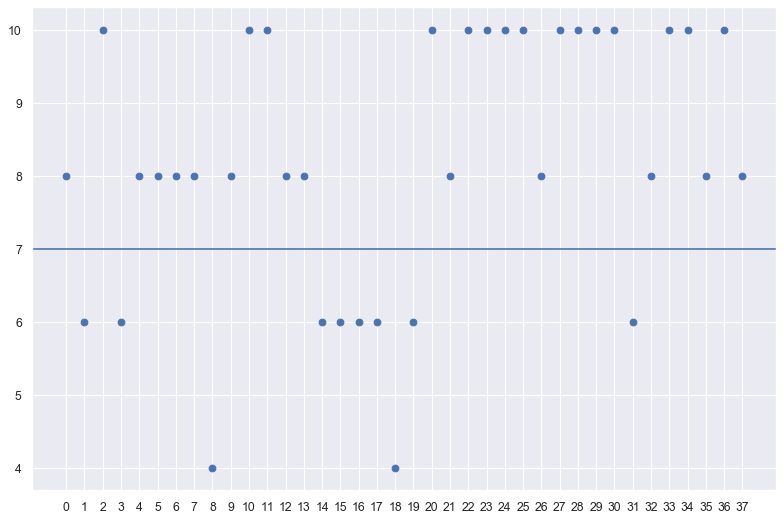

In [171]:
mean_gw_scores = []

threshold = 7

for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]
    gw_mask = single_u['ground_word'].astype(bool)
    #print(single_u)
    #print(gw_mask)
    gw_scores = single_u[gw_mask]['score']
    #print('user ind', user_ind, 'mean g word score', gw_scores.mean(), 'scores for ground words', gw_scores)
    mean_gw_scores.append(gw_scores.median())
    if gw_scores.mean()<threshold:
        
        bad_users.append(user_ind)
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')


plt.scatter(range(len(mean_gw_scores)), mean_gw_scores)
plt.axhline(threshold)
plt.xticks(np.arange(len(mean_gw_scores)))
plt.show()

#### all of the good ones in this case are above 7 as they should be for the ground words. 

In [172]:
mturk.loc[9, 'Random ID']

'18522'

## removing ground words if they already appear in the list to avoid double counting. 

In [173]:
res.head()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
0,0,1,0,event,0,0.002131,6
1,0,1,0,things,0,0.000778,8
2,0,1,0,bad,0,0.000492,2
3,0,1,0,events,1,0.978269,10
4,0,1,0,circumstances,0,0.000509,10


In [174]:
def gword_dupe_ground(x):
    #print(x)
    #print(x.index)
    #rows_to_drop = []
    dupe_mask = x['word'].duplicated(keep=False)
    dupe_x = x[dupe_mask]
    dupe_word_indexes = dupe_x[dupe_x['ground_word'].astype(bool)].index
    #print(dupe_word_indexes)
    #print(dupe_x['word'])
    return dupe_word_indexes
    '''#print(dupe_words)
    for w in dupe_words.unique().tolist(): # going through each of teh dupe words. 
        
        x[x['ground_word']]
        
        same_prob = len(x[x['word']==w]['prob'].unique().tolist())==1
        #print(x[x['word']==w]['score'])
        #print('same score', same_prob)
        if not same_prob: # removing ground truth words with a lower prob
            ind_mask = mask = x['word']==w
            # drop the smaller one
            smaller = np.argmin(x[ind_mask]['prob'])
            rows_to_drop.append( smaller )
            # np.arange(len(x['word']))
        else: # removing the first one to avoid double counting 
            ind_mask = mask = x['word']==w
            # drop the smaller one
            smaller = np.argmin(x[ind_mask].index)
            rows_to_drop.append( smaller )
    return rows_to_drop'''

res_rows_to_drop = res.groupby(['user_ind','q_ind']).apply(gword_dupe_ground)
res_rows_to_drop



user_ind  q_ind
0         0           Int64Index([3], dtype='int64')
          1           Int64Index([8], dtype='int64')
          2          Int64Index([20], dtype='int64')
          3          Int64Index([24], dtype='int64')
          4            Int64Index([], dtype='int64')
          5          Int64Index([40], dtype='int64')
          6            Int64Index([], dtype='int64')
          7            Int64Index([], dtype='int64')
          8          Int64Index([59], dtype='int64')
          9            Int64Index([], dtype='int64')
          10           Int64Index([], dtype='int64')
          11           Int64Index([], dtype='int64')
          12           Int64Index([], dtype='int64')
          13           Int64Index([], dtype='int64')
          14        Int64Index([101], dtype='int64')
1         0         Int64Index([108], dtype='int64')
          1         Int64Index([113], dtype='int64')
          2         Int64Index([125], dtype='int64')
          3         Int64Index

In [175]:
temp_rtod = []
for r in res_rows_to_drop:
    #print(r)
    for i in r: 
        try:
            temp_rtod.append(i)
        except:
            pass
temp_rtod;

In [176]:
res_rows_to_drop = np.asarray(temp_rtod)
res_rows_to_drop

array([   3,    8,   20,   24,   40,   59,  101,  108,  113,  125,  129,
        145,  164,  206,  213,  218,  230,  234,  250,  269,  311,  318,
        323,  335,  339,  355,  374,  416,  423,  428,  440,  444,  460,
        479,  521,  528,  533,  545,  549,  565,  584,  626,  633,  638,
        650,  654,  670,  689,  731,  738,  743,  755,  759,  775,  794,
        836,  843,  848,  860,  864,  880,  899,  941,  948,  953,  965,
        969,  985, 1004, 1046, 1053, 1058, 1070, 1074, 1090, 1109, 1151,
       1158, 1163, 1175, 1179, 1195, 1214, 1256, 1263, 1268, 1280, 1284,
       1300, 1319, 1361, 1368, 1373, 1385, 1389, 1405, 1424, 1466, 1473,
       1478, 1490, 1494, 1510, 1529, 1571, 1578, 1583, 1595, 1599, 1615,
       1634, 1676, 1683, 1688, 1700, 1704, 1720, 1739, 1781, 1788, 1793,
       1805, 1809, 1825, 1844, 1886, 1893, 1898, 1910, 1914, 1930, 1949,
       1991, 1998, 2003, 2015, 2019, 2035, 2054, 2096, 2113, 2114, 2127,
       2132, 2144, 2153, 2159, 2168, 2173, 2179, 22

In [177]:
c_res = res.drop(res_rows_to_drop, axis=0,)

In [178]:
c_res[c_res['ground_word'].astype(bool)].head() # checking that there are some 
# ground words that remain

,user_ind,turk_v,q_ind,word,ground_word,prob,score
31,0,1,4,creek,1,0.000046,4
43,0,1,6,adept,1,0.000358,4
53,0,1,7,shock,1,0.016271,10
64,0,1,9,novel,1,0.000234,4
76,0,1,10,secretaries,1,0.000174,10


## Prob assigned by model to ground words

In [179]:
res[res['ground_word'].astype(bool)].drop_duplicates('word')

,user_ind,turk_v,q_ind,word,ground_word,prob,score
3,0,1,0,events,1,0.978269,10
8,0,1,1,would,1,0.042942,6
20,0,1,2,edge,1,0.279860,10
24,0,1,3,a,1,0.416199,10
31,0,1,4,creek,1,0.000046,4
40,0,1,5,is,1,0.077139,4
43,0,1,6,adept,1,0.000358,4
53,0,1,7,shock,1,0.016271,10
59,0,1,8,the,1,0.360194,10
64,0,1,9,novel,1,0.000234,4


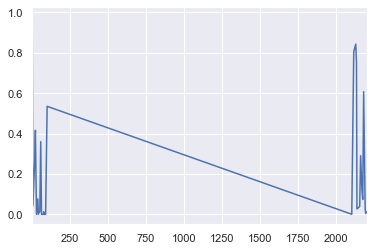

In [180]:
# What is the TF prob assigned to the ground words. 

res[res['ground_word'].astype(bool)].drop_duplicates('word')['prob'].plot() 

Text(0.5, 0, 'score')

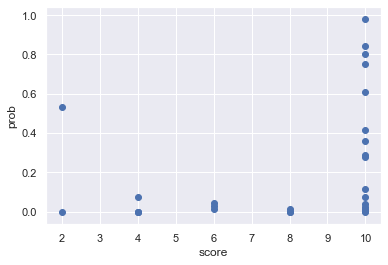

In [181]:
unique_ground = res[res['ground_word'].astype(bool)].drop_duplicates('word')
plt.scatter( unique_ground['score'] ,unique_ground['prob'])
plt.ylabel('prob')
plt.xlabel('score')

### Optional - Getting rid of all the ground words

In [182]:
c_res=c_res[np.invert(c_res['ground_word'].astype(bool))]

### Setting the good users

In [183]:
good_users = list(set(res['user_ind'].unique().tolist())-set(bad_users))
good_users

[2, 6, 10, 11, 12, 13, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 33, 34, 35, 36]

In [184]:
len(good_users)

20

In [185]:
len(good_users)

20

# Plots without the bad users

In [186]:
guser_mask = c_res['user_ind'].apply(lambda x: x in good_users)
guser = c_res[guser_mask]

In [187]:
c_res.shape

(3420, 7)

In [188]:
c_res.head()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
0,0,1,0,event,0,0.002131,6
1,0,1,0,things,0,0.000778,8
2,0,1,0,bad,0,0.000492,2
4,0,1,0,circumstances,0,0.000509,10
5,0,1,0,events,0,0.978268,10


In [189]:
guser.shape

(1800, 7)

In [109]:
guser.head()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
210,2,1,0,event,0,0.002131,6
211,2,1,0,things,0,0.000778,8
212,2,1,0,bad,0,0.000492,8
214,2,1,0,circumstances,0,0.000509,8
215,2,1,0,events,0,0.978268,10


(0, 10.5)

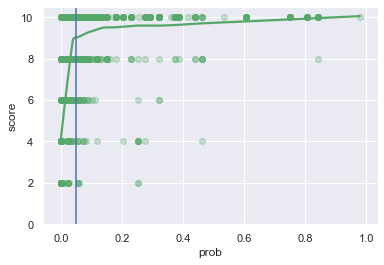

In [56]:
# put a linear regression through this. 



import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=guser['prob'], y=guser['score'], #robust=True,
                 lowess=True,
                 color="g", scatter_kws={'alpha':0.3})
plt.axvline(0.05)
plt.ylim([0,10.5])

(0, 10.5)

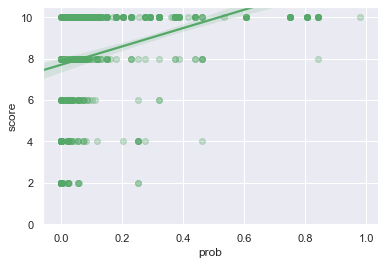

In [57]:
ax = sns.regplot(x=guser['prob'], y=guser['score'], robust=True,
                 color="g", scatter_kws={'alpha':0.3})
plt.ylim([0,10.5])

(0, 10.5)

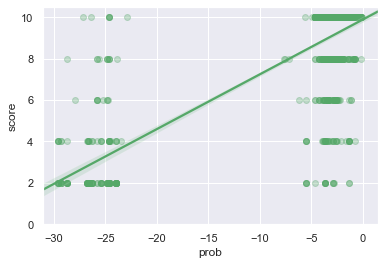

In [58]:
ax = sns.regplot(x=np.log(guser['prob']), y=guser['score'], robust=True,
                 color="g", scatter_kws={'alpha':0.3})
plt.ylim([0,10.5])

In [59]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True)
x = pd.DataFrame(np.log(guser['prob']))
reg.fit( x, guser['score'].values )
reg.score(x,guser['score'].values )
# goes from 10% to almost 50% with a log term!

0.5252805041520048

In [60]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True)
x = guser['prob']
x2 = x**2
print(x2.shape)
X = pd.DataFrame([x, x2, x**3, x**4]).T
print(X.shape)
reg.fit( X, guser['score'].values )

grid_x = np.arange(0,1, 0.01)
grid_X = pd.DataFrame([grid_x, grid_x**2, grid_x**3, grid_x**4]).T
preds = reg.predict(grid_X)

(900,)
(900, 4)


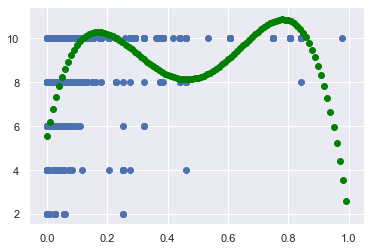

In [61]:
plt.scatter(guser['prob'], guser['score'])
plt.scatter(grid_x, preds, color='green')
#plt.ylim([0,10.5])

In [62]:
guser.groupby('score').apply(lambda x: len(x))

score
2     109
4      65
6      58
8     173
10    495
dtype: int64

# Bootstrapping medians

In [63]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
def mad(vals):
    boot = bs.bootstrap(vals['prob'].values, stat_func=bs_stats.median)
    return boot.upper_bound - boot.value
    
    '''med = vals['prob'].median()
    k = 1.4826 # assuming normal... 
    madd = np.sum(np.abs(vals['prob'] - med))
    return madd/(madd*k)'''
    
    

medians = guser.groupby('score').median()['prob']
#errors = (1.96*(.std()['prob']/np.sqrt(guser.groupby('score').apply(lambda x:len(x)) )))

errors = guser.groupby('score').apply(mad)
errors

score
2     4.936429e-12
4     4.054102e-03
6     1.068017e-02
8     1.381413e-02
10    1.137958e-02
dtype: float64

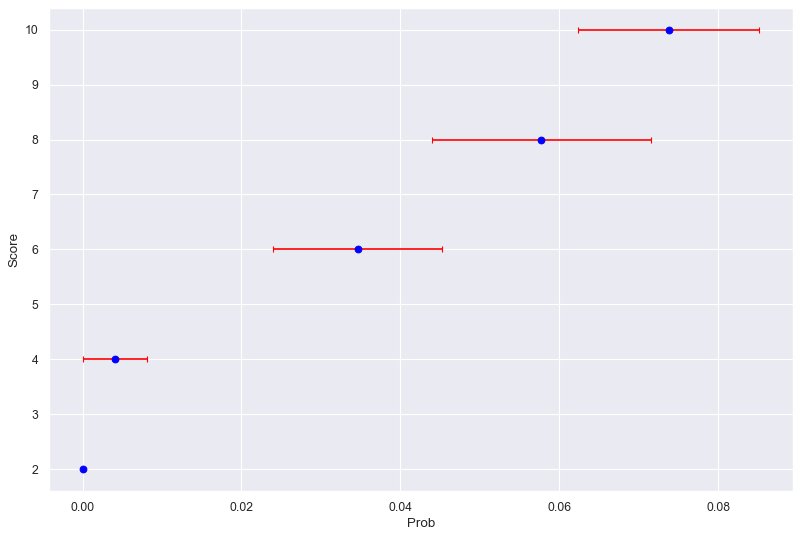

In [64]:
x_pos = medians #np.arange(len(means))
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar(x_pos, means.index, xerr=errors, ecolor='red', fmt='o', capsize=3, color = 'blue')
plt.xlabel('Prob')
plt.ylabel('Score')
plt.show()


## Calculating Means

In [65]:



means = guser.groupby('score').mean()['prob']
errors = (1.96*(guser.groupby('score').std()['prob']/np.sqrt(guser.groupby('score').apply(lambda x:len(x)) )))

errors

score
2     0.006682
4     0.022542
6     0.016867
8     0.016898
10    0.017797
dtype: float64

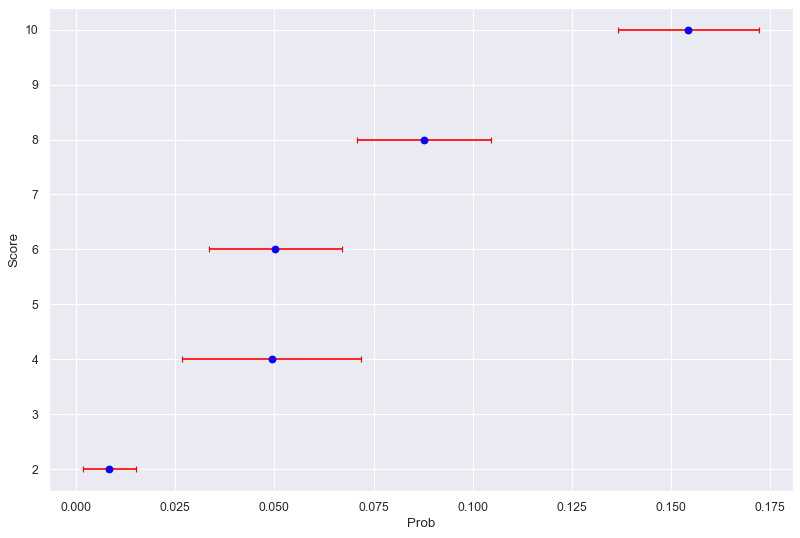

In [66]:
x_pos = means #np.arange(len(means))
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar(x_pos, means.index, xerr=errors, ecolor='red', fmt='o', capsize=3, color = 'blue')
plt.xlabel('Prob')
plt.ylabel('Score')
plt.show()


In [67]:
def mean_boot(vals):
    boot = bs.bootstrap(vals['prob'].values, stat_func=bs_stats.mean)
    return boot.upper_bound - boot.value

means = guser.groupby('score').mean()['prob']
errors = guser.groupby('score').apply(mean_boot)

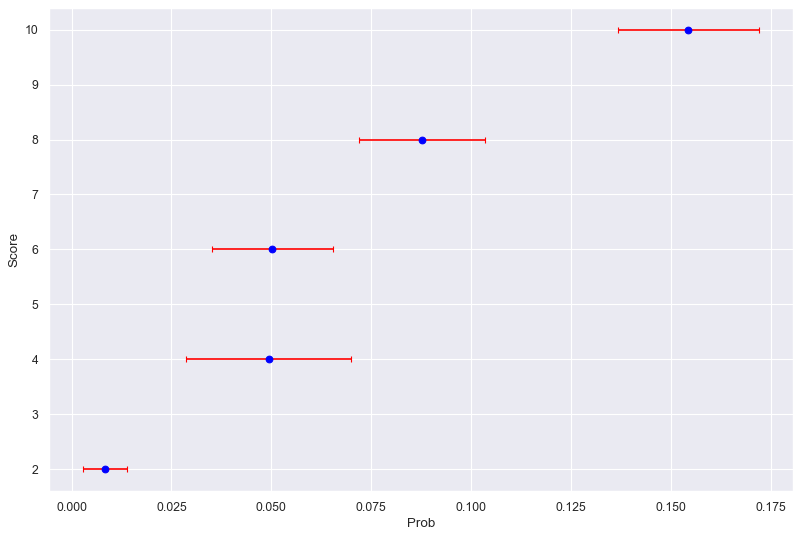

In [68]:
x_pos = means #np.arange(len(means))
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar(x_pos, means.index, xerr=errors, ecolor='red', fmt='o', capsize=3, color = 'blue')
plt.xlabel('Prob')
plt.ylabel('Score')
plt.show()
#plt.scatter(means, means.index)


## Creating a model for predicting the score given probability. Seeing if this is nonlinear

In [110]:
guser.head() # free of ground words that may have overly low probs. 

,user_ind,turk_v,q_ind,word,ground_word,prob,score
210,2,1,0,event,0,0.002131,6
211,2,1,0,things,0,0.000778,8
212,2,1,0,bad,0,0.000492,8
214,2,1,0,circumstances,0,0.000509,8
215,2,1,0,events,0,0.978268,10


In [111]:
guser.tail()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
3879,36,2,14,there,0,4.289242e-02,10
3880,36,2,14,EVA,0,1.928819e-11,10
3882,36,2,14,it,0,2.908443e-02,10
3883,36,2,14,this,0,3.677039e-02,10
3884,36,2,14,in,0,2.545756e-02,10


In [113]:
guser.shape

(900, 7)

In [114]:
# pooling the average score across users.

def score_summaries(x):
    sc = x['score']
    x_mean = sc.mean()
    err =1.96*(sc.std()/np.sqrt(len(sc)) )
    return [sc.median(), x['prob'].values[0]]

median_scores = guser.groupby(['q_ind', 'turk_v', 'word']).apply(score_summaries)
median_scores = pd.DataFrame(median_scores)
median_scores.head()

0
q_ind turk_v word                                       
0     1      Population     [6.0, 7.025027803399253e-13]
             bad            [8.0, 0.0004916115431115031]
             circumstances  [8.0, 0.0005090322229079902]
             event          [6.0, 0.0021306623239070177]
             events           [10.0, 0.9782679080963135]

In [115]:
median_scores['median_score'] = median_scores[0].apply(lambda x: x[0])
median_scores['prob'] = median_scores[0].apply(lambda x: x[1])
median_scores.head(10)

0  median_score  \
q_ind turk_v word                                                        
0     1      Population     [6.0, 7.025027803399253e-13]           6.0   
             bad            [8.0, 0.0004916115431115031]           8.0   
             circumstances  [8.0, 0.0005090322229079902]           8.0   
             event          [6.0, 0.0021306623239070177]           6.0   
             events           [10.0, 0.9782679080963135]          10.0   
             things         [8.0, 0.0007781028398312628]           8.0   
      2      Demons           [8.0, 0.09158789366483688]           8.0   
             Devils          [8.0, 0.019027840346097946]           8.0   
             Ghosts          [8.0, 0.023113250732421875]           8.0   
             Witches          [8.0, 0.03481363505125046]           8.0   

                                    prob  
q_ind turk_v word                         
0     1      Population     7.025028e-13  
             bad            4.916115e-04  
             circumstances  5.090322e-04  
             event          2.130662e-03  
             events         9.782679e-01  
             things         7.781028e-04  
      2      Demons         9.158789e-02  
             Devils         1.902784e-02  
             Ghosts         2.311325e-02  
             Witches        3.481364e-02

(0, 10.5)

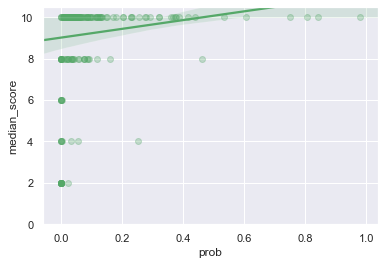

In [116]:
ax = sns.regplot(x=median_scores['prob'], y=median_scores['median_score'], robust=True,
                 color="g", scatter_kws={'alpha':0.3})
plt.ylim([0,10.5])

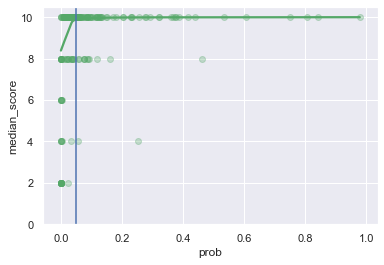

In [117]:
ax = sns.regplot(x=median_scores['prob'], y=median_scores['median_score'], lowess=True,
                 color="g", scatter_kws={'alpha':0.3})
plt.ylim([0,10.5])
plt.axvline(0.05)

In [118]:
x = []
y = []
for q, k in median_scores.groupby(['q_ind', 'turk_v']):
    x.append(k['prob'].values)
    y.append(k['median_score'].values)

In [119]:
# pairing the highest prob word with all the others for each of these: 
x_ml = []
y_ml = []
for q_prob, q_score in zip(x,y): 
    
    max_prob_ind = np.argmax(q_prob)
    max_prob = np.log(q_prob[max_prob_ind])
    
    for j in range(len(q_prob)):
        if j == max_prob_ind:
            continue
        else: 
            #including an interaction term. 
            x_ml.append( [max_prob, np.log(q_prob[j]), max_prob+ np.log(q_prob[j])] )
            y_ml.append( q_score[j] )

In [120]:
len(x_ml)

150

In [121]:
x_ml = pd.DataFrame(x_ml)
y_ml = pd.DataFrame(y_ml)

In [122]:
# hypothesis is that as the max score goes down, the curve is smoother and the curr score goes up. 

In [125]:
# plotting this in 3 dimensions. 
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_ml[0], x_ml[1], y_ml)

ax.set_xlabel('Max Prob')
ax.set_ylabel('Curr Prob')
ax.set_zlabel('Curr Score')

plt.show()

(0, 10.5)

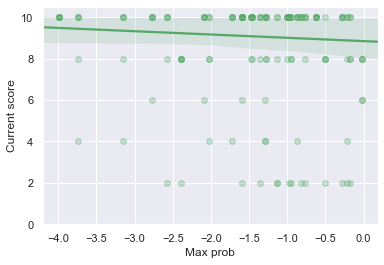

In [127]:
%matplotlib inline
# this is not stat sig
ax = sns.regplot(x=x_ml[0], y=y_ml, robust=True,
                 color="g", scatter_kws={'alpha':0.3})
plt.xlabel('Max prob')
plt.ylabel('Current score')
plt.ylim([0,10.5])

(0, 10.5)

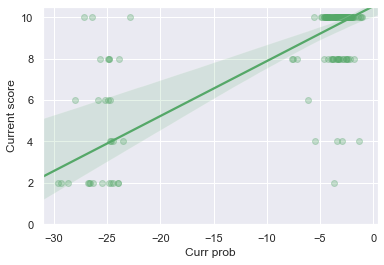

In [128]:
ax = sns.regplot(x=x_ml[1], y=y_ml, robust=True,
                 color="g", scatter_kws={'alpha':0.3})
plt.xlabel('Curr prob')
plt.ylabel('Current score')
plt.ylim([0,10.5])

In [129]:
y_ml.shape

(150, 1)

In [130]:
x_ml.head()

,0,1,2
0,-0.021972,-27.984127,-28.006099
1,-0.021972,-7.617822,-7.639793
2,-0.021972,-7.582999,-7.604971
3,-0.021972,-6.151322,-6.173294
4,-0.021972,-7.158652,-7.180624


In [131]:
y_ml.head()

,0
0,6.0
1,8.0
2,8.0
3,6.0
4,8.0


In [132]:
# RF overfits and produces worse results than a linear regression. 
# I need to test the linear regression assumptions in order to interpret the coefficients and
# should definitely be using a robust version

# but only a linear regression with log probs performs so well, 
# this does a good job of separating out the data here where there are low probs. that can be treated differently

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor

# how to do a robust linear regression? 
reg = LinearRegression(fit_intercept=True) #RandomForestRegressor() #LinearRegression(fit_intercept=True ) # 

splitter= StratifiedKFold(n_splits=3, shuffle=True)
accuracies = []
train_accs = []
feat_imps = dict()

for i in range(10):
    for train_index, test_index in splitter.split(x_ml,y_ml):
        X_train, X_test = x_ml.iloc[train_index], x_ml.iloc[test_index]
        y_train, y_test = y_ml.iloc[train_index].values.ravel(), y_ml.iloc[test_index].values.ravel()
        reg.fit(X_train, y_train) # solver='lbfgs', max_iter=1000
        train_accs.append(reg.score(X_train, y_train))
        accuracies.append(reg.score(X_test, y_test))
        '''for ind, e in enumerate(reg.feature_importances_):
            try:
                feat_imps[ind].append(e)
            except:
                feat_imps[ind] = [e]
        '''

print('train accs', train_accs, sum(train_accs)/len(train_accs))
print('test accs', accuracies, sum(accuracies)/len(accuracies))

train accs [0.5205988765220133, 0.5252074355665601, 0.5485017499849758, 0.5614632874829016, 0.6307880972150448, 0.42771087062432755, 0.5860435749727361, 0.5167425620643777, 0.4981372369191591, 0.590979730288105, 0.5104076848305854, 0.49995693151951687, 0.6314789567634762, 0.4328684683899742, 0.5491152317632197, 0.539787239444927, 0.548927272026404, 0.5074513530576837, 0.6218024850439339, 0.42656747549352114, 0.564432172379859, 0.6113566358839616, 0.4911543065087414, 0.5043619529698273, 0.6053857693758335, 0.4541453080821593, 0.5484469317889485, 0.5015333422626554, 0.5968173551292434, 0.49795645288618795] 0.5350042249080288
test accs [0.5460603322763123, 0.5295821152292737, 0.47019900114297813, 0.4689356231937343, 0.31160800957997425, 0.7447658564699191, 0.41326101490059536, 0.5470306918677803, 0.5982509757417066, 0.4080637161974234, 0.5539067255651404, 0.5965157631760636, 0.29203678632959273, 0.690440875115644, 0.47335105642532255, 0.511100639710916, 0.48753556565907413, 0.573627693099

In [134]:
for k,v in feat_imps.items():
    print(sum(v)/len(v))

In [135]:
reg.feature_importances_

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

In [136]:
# how accurate with only the info for this value? 

splitter= StratifiedKFold(n_splits=3, shuffle=True)
accuracies = []
train_accs = []

reg = LinearRegression(fit_intercept=True) #LinearRegression(fit_intercept=True)#RandomForestRegressor()#LinearRegression(fit_intercept=True)

for i in range(10):
    for train_index, test_index in splitter.split(x_ml,y_ml):
        X_train, X_test = x_ml.iloc[train_index, 1].values.reshape(-1,1), x_ml.iloc[test_index,1].values.reshape(-1,1)
        #print((X_train))
        y_train, y_test = y_ml.iloc[train_index].values.ravel(), y_ml.iloc[test_index].values.ravel()
        reg.fit(X_train, y_train) # solver='lbfgs', max_iter=1000
        train_accs.append(reg.score(X_train, y_train))
        accuracies.append(reg.score(X_test, y_test))

print('train accs', train_accs, sum(train_accs)/len(train_accs))
print('test accs', accuracies, sum(accuracies)/len(accuracies))

train accs [0.5650731813774481, 0.544592327999432, 0.45982613550068824, 0.5424944755649802, 0.5005430329509846, 0.5238331855726666, 0.5071024579053693, 0.5523298296143548, 0.5140593661416348, 0.4364193156145722, 0.6321938311552413, 0.5012933745323631, 0.5093474721361666, 0.552102426440211, 0.5064597103870495, 0.5489228372875963, 0.5219624026515289, 0.49729366568029415, 0.5254140691840863, 0.4910658531832978, 0.5429710168048347, 0.5868750039875229, 0.4785365824815569, 0.5114676481246634, 0.5717185340814044, 0.4704044575174629, 0.5281935854128595, 0.6264572137780522, 0.4510054886103209, 0.5046886286786554] 0.5234882370119097
test accs [0.43342426860673045, 0.4727494637256682, 0.6591204181038464, 0.4785753132550324, 0.548194363960463, 0.494612192097511, 0.5132225960754706, 0.45423205454310267, 0.5274157855239763, 0.6618650481610322, 0.3013748657854063, 0.5614466797125561, 0.5386728820044275, 0.45306911217620727, 0.5385872822615909, 0.4575864116429158, 0.5153606796155148, 0.566409386918422

In [137]:
reg.coef_

array([0.21029329])

### Asking the model to predict the lowest probability of a score of 8. 


In [138]:
median_scores.head()

0  median_score  \
q_ind turk_v word                                                        
0     1      Population     [6.0, 7.025027803399253e-13]           6.0   
             bad            [8.0, 0.0004916115431115031]           8.0   
             circumstances  [8.0, 0.0005090322229079902]           8.0   
             event          [6.0, 0.0021306623239070177]           6.0   
             events           [10.0, 0.9782679080963135]          10.0   

                                    prob  
q_ind turk_v word                         
0     1      Population     7.025028e-13  
             bad            4.916115e-04  
             circumstances  5.090322e-04  
             event          2.130662e-03  
             events         9.782679e-01

In [139]:
x = []
y = []
meta_deets = []
for q, k in median_scores.groupby(['q_ind', 'turk_v']):
    x.append(k['prob'].values)
    y.append(k['median_score'].values)
    meta_deets.append(q)


In [140]:
len(x)

30

In [141]:
x_ml = []
y_ml = []
for q_prob, q_score in zip(x,y): 
    
    if 8 not in q_score:
        continue
        
    q_prob = np.log(q_prob)
    
    eight_inds = np.where(q_score==8)[0]
    
    min_eight_prob = np.min(q_prob[eight_inds])
    '''l_ind = np.where(q_prob == min_eight_prob)[0]
    '''
    
    x_ml.append( q_prob )
    y_ml.append( min_eight_prob )

In [142]:
np.argmin(y[0][np.where(y[0]==6)[0]])

0

In [143]:
len(x_ml)

17

In [144]:
x_ml = pd.DataFrame(x_ml)
y_ml = pd.DataFrame(y_ml)

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.ensemble import RandomForestRegressor

# how to do a robust linear regression? 
reg = RandomForestRegressor()#LinearRegression(fit_intercept=True) #RandomForestRegressor() #LinearRegression(fit_intercept=True ) # 

splitter= KFold(n_splits=10, shuffle=True)
accuracies = []
train_accs = []
feat_imps = dict()

for i in range(10):
    for train_index, test_index in splitter.split(x_ml,y_ml):
        X_train, X_test = x_ml.iloc[train_index], x_ml.iloc[test_index]
        y_train, y_test = y_ml.iloc[train_index].values.ravel(), y_ml.iloc[test_index].values.ravel()
        reg.fit(X_train, y_train)
        train_accs.append(reg.score(X_train, y_train))
        accuracies.append(reg.score(X_test, y_test))
        '''for ind, e in enumerate(reg.feature_importances_):
            try:
                feat_imps[ind].append(e)
            except:
                feat_imps[ind] = [e]
        '''

print('train accs', train_accs, sum(train_accs)/len(train_accs))
print('test accs', accuracies, sum(accuracies)/len(accuracies))

/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression

train accs [0.8440517270678735, 0.8637796293096038, 0.7506912174660192, 0.7856106810208988, 0.8031792164695154, 0.833079934808753, 0.7661290565504041, 0.7539968022130417, 0.787155931605561, 0.7784643692088684, 0.7495875451337617, 0.7421981148309488, 0.5106186758103433, 0.873797173069109, 0.8164463785761015, 0.8296071865237818, 0.8226912125077723, 0.6602653767531095, 0.8714052820511105, 0.8156659101472759, 0.8037072761332691, 0.8826960965453149, 0.7892987693981384, 0.8010547964552989, 0.8527016428039262, 0.7869962725798627, 0.8076000699651218, 0.7462143002526903, 0.7485781676840484, 0.7472097608419909, 0.699116516786422, 0.8356161086413696, 0.8862645655794772, 0.8814281342263122, 0.8035621872530654, 0.6340645390859787, 0.8633568772753382, 0.7731543266161165, 0.8172773556114038, 0.7807979088404436, 0.5894709598326342, 0.7889327452906445, 0.7457591724618946, 0.815481148131534, 0.7171698814238912, 0.8437399511221256, 0.8393429277439792, 0.8854958319789784, 0.7320223801289438, 0.87866692434

/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWa

# Why do I have negative R^2 values?!?!

# Seeing what the distribution of scores is within a single question

In [190]:
# getting all the answers for each of the differnet words
words_and_probs = dict() #save tuple of index and turk version. 
for k, v in guser.groupby(['q_ind', 'turk_v', 'word']):
    key = ( v['q_ind'].values[0], v['turk_v'].values[0] )
    #print(key)
    #print(v)
    
    v_to_store = (v['score'].mean(), (1.96*(v['score'].std()/np.sqrt(len(v['score'])))), v['score'].values)
    
    try: 
        words_and_probs[key].append( (v['prob'].values[0], v_to_store))
    except:
        words_and_probs[key] = [ ( v['prob'].values[0], v_to_store  )]
        #words_and_probs[key].append()
    
    

In [191]:
words_and_probs

{(0,
  1): [(7.025027803399253e-13,
   (3.6666666666666665,
    1.5734350249621936,
    array([6, 6, 2, 2, 4, 2]))), (0.0004916115431115031,
   (4.333333333333333,
    2.35562683330314,
    array([8, 2, 2, 4, 2, 8]))), (0.0005090322229079902,
   (7.333333333333333,
    1.652817123714673,
    array([ 8,  8, 10,  8,  6,  4]))), (0.0021306623239070177,
   (8.0,
    1.4313816169468343,
    array([ 6, 10, 10,  8,  8,  6]))), (0.9782679080963135,
   (10.0, 0.0, array([10, 10, 10, 10, 10, 10]))), (0.0007781028398312628,
   (8.0, 1.4313816169468343, array([ 8,  8, 10,  6,  6, 10])))],
 (0,
  2): [(0.09158789366483688,
   (8.428571428571429,
    1.175179200737553,
    array([ 8,  2,  8,  6, 10, 10, 10, 10, 10, 10, 10,  8,  8,  8]))), (0.019027840346097946,
   (8.142857142857142,
    1.1226890795009854,
    array([ 4,  4,  8,  6, 10, 10, 10, 10, 10,  8, 10,  8,  8,  8]))), (0.023113250732421875,
   (7.0,
    1.283121194587635,
    array([ 6,  4,  6,  6, 10,  8, 10, 10,  2,  4,  8,  8,  8,  8])))

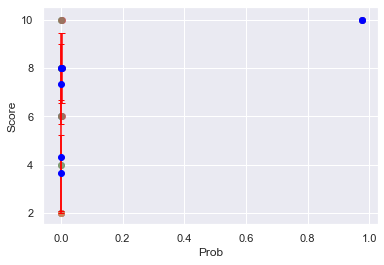

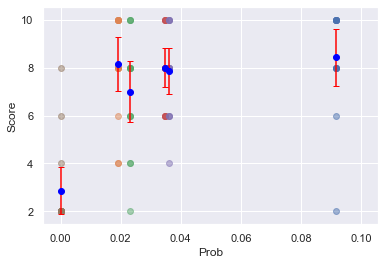

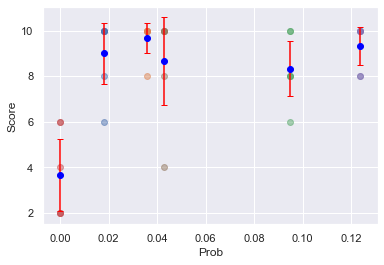

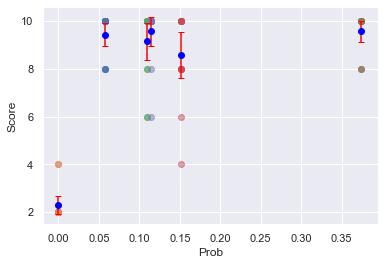

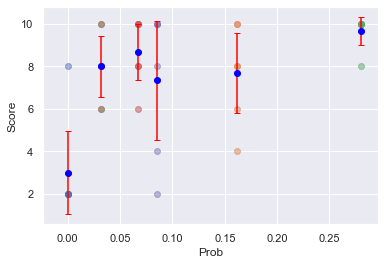

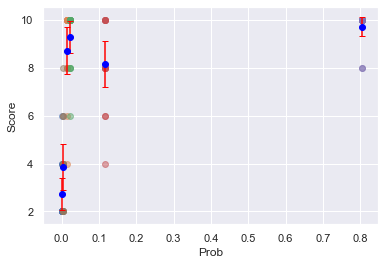

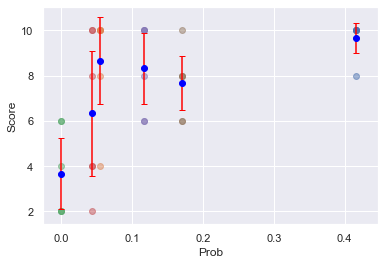

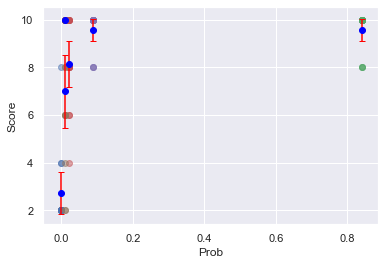

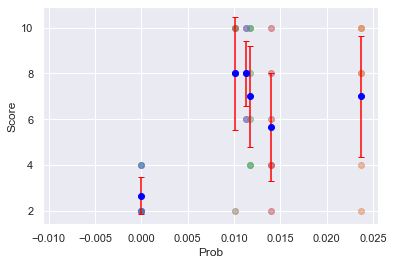

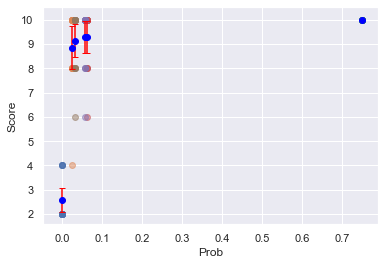

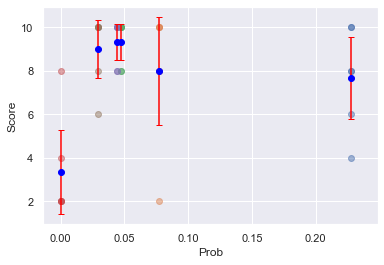

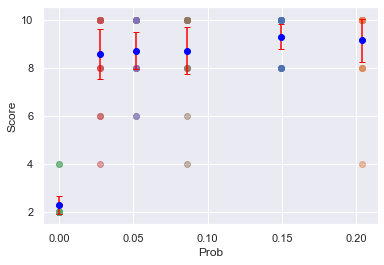

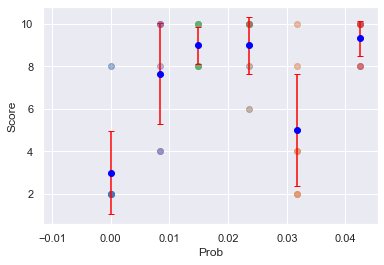

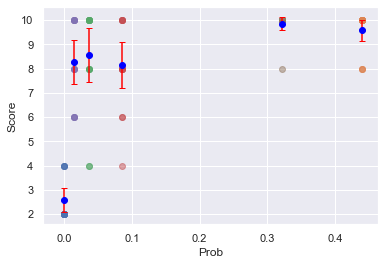

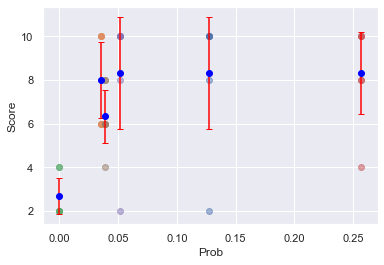

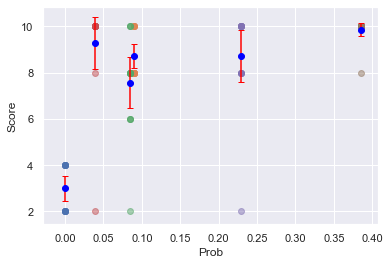

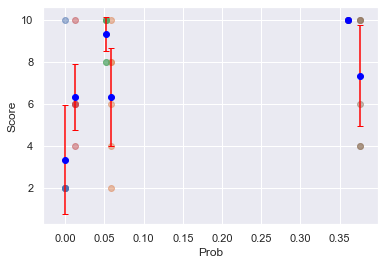

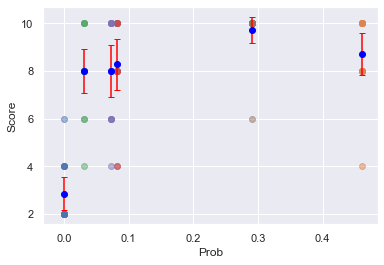

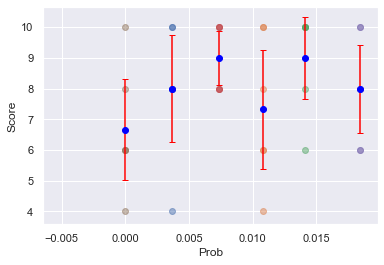

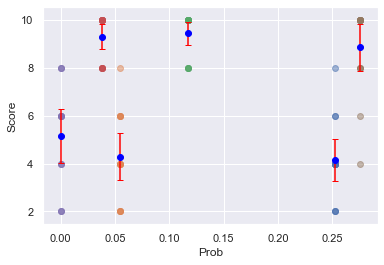

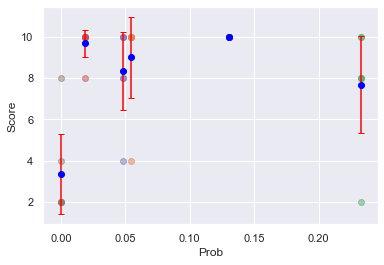

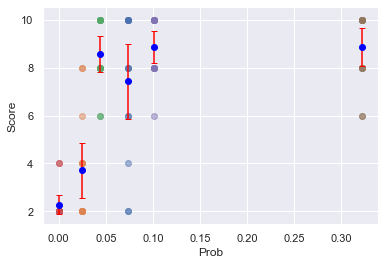

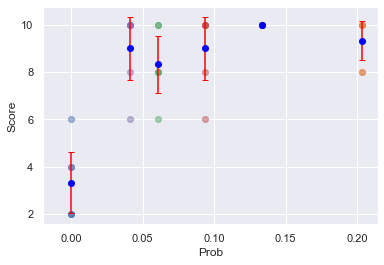

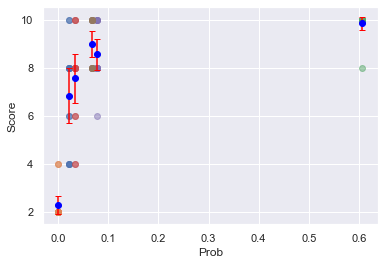

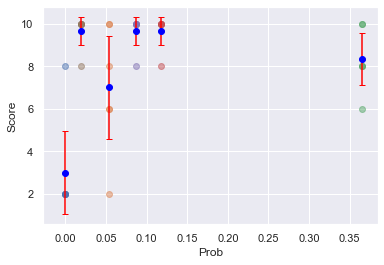

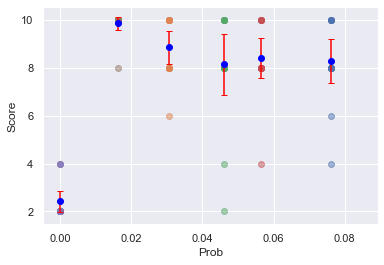

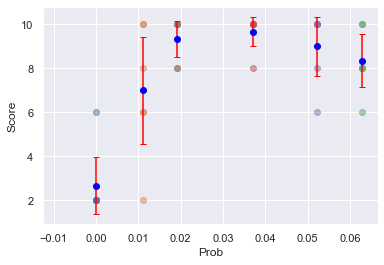

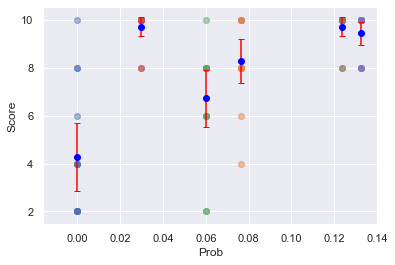

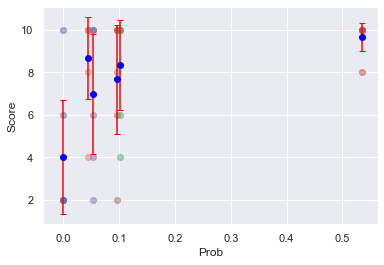

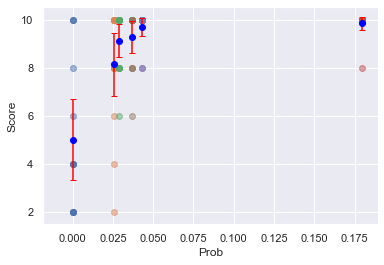

In [194]:
for k, v in words_and_probs.items():
    for tup in v: 
        #plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
        plt.scatter([tup[0]]*len(tup[1][2]), tup[1][2], alpha=0.5)
        plt.errorbar(tup[0], tup[1][0], yerr=tup[1][1], ecolor='red', fmt='o', capsize=3, color = 'blue')
        plt.xlabel('Prob')
        plt.ylabel('Score')
        #plt.scatter([tup[0]]*1, tup[1][0], alpha=1)
        
    plt.show()

# Seeing what the average score each user gave the highest probability word

# All code needed to plot the median scores and their location in the tail distribution

In [84]:
# pooling the average score across users.

def score_summaries(x):
    sc = x['score']
    x_mean = sc.mean()
    err =1.96*(sc.std()/np.sqrt(len(sc)) )
    return [sc.median(), x['prob'].values[0]]

median_scores = guser.groupby(['q_ind', 'turk_v', 'word']).apply(score_summaries)
median_scores = pd.DataFrame(median_scores)
median_scores.head()

0
q_ind turk_v word                                       
0     1      Population     [4.0, 7.025027803399253e-13]
             bad            [3.0, 0.0004916115431115031]
             circumstances  [6.0, 0.0005090322229079902]
             event          [6.0, 0.0021306623239070177]
             events           [10.0, 0.9782679080963135]

In [85]:
median_scores['median_score'] = median_scores[0].apply(lambda x: x[0])
median_scores['prob'] = median_scores[0].apply(lambda x: x[1])
median_scores.head(10)

0  median_score  \
q_ind turk_v word                                                        
0     1      Population     [4.0, 7.025027803399253e-13]           4.0   
             bad            [3.0, 0.0004916115431115031]           3.0   
             circumstances  [6.0, 0.0005090322229079902]           6.0   
             event          [6.0, 0.0021306623239070177]           6.0   
             events           [10.0, 0.9782679080963135]          10.0   
             things         [8.0, 0.0007781028398312628]           8.0   
      2      Demons           [9.0, 0.09158789366483688]           9.0   
             Devils          [8.0, 0.019027840346097946]           8.0   
             Ghosts          [8.0, 0.023113250732421875]           8.0   
             Witches          [8.0, 0.03481363505125046]           8.0   

                                    prob  
q_ind turk_v word                         
0     1      Population     7.025028e-13  
             bad            4.916115e-04  
             circumstances  5.090322e-04  
             event          2.130662e-03  
             events         9.782679e-01  
             things         7.781028e-04  
      2      Demons         9.158789e-02  
             Devils         1.902784e-02  
             Ghosts         2.311325e-02  
             Witches        3.481364e-02

In [97]:
x = []
y = []
meta_deets = []
for q, k in median_scores.groupby(['q_ind', 'turk_v']):
    x.append(k['prob'].values)
    y.append(k['median_score'].values)
    meta_deets.append(q)

In [98]:
# pairing the highest prob word with all the others for each of these: 
x_ml = []
y_ml = []
for q_prob, q_score in zip(x,y): 
    
    max_prob_ind = np.argmax(q_prob)
    max_prob = np.log(q_prob[max_prob_ind])
    
    for j in range(len(q_prob)):
        if j == max_prob_ind:
            continue
        else: 
            #including an interaction term. 
            x_ml.append( [max_prob, np.log(q_prob[j]), max_prob+ np.log(q_prob[j])] )
            y_ml.append( q_score[j] )

In [99]:
len(x_ml)

150

In [90]:
x_ml = pd.DataFrame(x_ml)
y_ml = pd.DataFrame(y_ml)

(array([17.,  5., 11.,  3.,  0., 16., 10., 55.,  4., 29.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

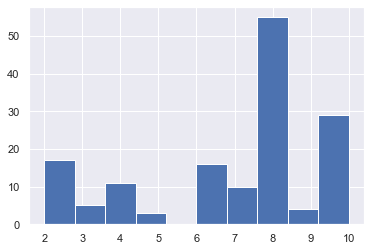

In [91]:
plt.hist(y_ml.values)

In [429]:
# connecting these y points to the underlying distributions. where would nuc and tfs be drawing 
# overlay where the sampled points are and what their actual scores are. 

# what is the underlying pattern behind these score distributions? 

In [197]:
df1 = pd.read_csv('MTURK_FIRST_backup_of_different_prob_slices.csv')
df2 = pd.read_csv('MTURK_QUESTIONS_TWO__backup_of_different_prob_slices.csv')

In [198]:
meta_deets; # is question index and then turk version. 

In [199]:
df1.head()

,Unnamed: 0,prompt_ind,time_point,batch_ind,ind_in_batch,leading_words,ground_word,ground_word_prob,words,abs_inds,probs
0,0,19,28,0,19,"change something, might be the one trigger th...",events,4.103564e-07,['events' 'event' 'things' 'circumstances' 'ba...,"[0, 1, 2, 3, 4, 50158]","[0.9782679, 0.0021306623, 0.00077810284, 0.000..."
1,1,72,100,3,2,the world ’ s leading pharmaceutical companie...,would,5.513494e-05,['were' 'had' 'would' 'could' 'are' 'iterator'],"[0, 3, 5, 6, 7, 50140]","[0.123787306, 0.09488712, 0.04294153, 0.035621..."
2,2,31,29,1,8,off guard. While your body lay half on the co...,edge,1.622044e-06,['edge' 'counter' 'sink' 'side' 'table' 'Plot'],"[0, 1, 2, 3, 4, 50130]","[0.27985963, 0.1617055, 0.08516163, 0.06683456..."
3,3,56,73,2,10,I'm getting rrREAdy''. My murmur had ended with,a,5.716932e-05,['a' 'the' 'my' 'an' 'me' 'conservancy'],"[0, 1, 2, 3, 4, 50140]","[0.41619945, 0.17138307, 0.11777301, 0.0551321..."
4,4,24,60,1,1,crunched underneath and the ground bubbled wi...,creek,2.153896e-08,['and' 'of' 'oak' 'sand' 'sky' 'Eat'],"[4, 5, 6, 7, 8, 50156]","[0.023683885, 0.013982991, 0.011684752, 0.0113..."


In [102]:
batch_size=25
num_batches=4
prompt_length=100
generated_length=150
tot_len = prompt_length+generated_length

import encoder
from decodeLogits import *
model_name='774M' #345M
models_dir='../gpt-2/models'
enc = encoder.get_encoder(model_name, models_dir)

prompts=pd.read_csv('test_dataframe_500primer.csv')

In [103]:
gpt_out_path = 'gpt-2_output/'
additional_path = '-model_774M-seed_27'#'' 
#all_perps = pickle.load( gzip.open(gpt_out_path+'all_perplexities_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb'))
all_logits = pickle.load( gzip.open(gpt_out_path+'all_logits_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb')) # needed to get the probabilities
text = pickle.load( gzip.open(gpt_out_path+'all_text_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb'))

In [104]:
y_ml.iloc[0].values

AttributeError: 'list' object has no attribute 'iloc'

In [105]:
len(meta_deets)

30

In [110]:
meta_deets

[(0, 1),
 (0, 2),
 (1, 1),
 (1, 2),
 (2, 1),
 (2, 2),
 (3, 1),
 (3, 2),
 (4, 1),
 (4, 2),
 (5, 1),
 (5, 2),
 (6, 1),
 (6, 2),
 (7, 1),
 (7, 2),
 (8, 1),
 (8, 2),
 (9, 1),
 (9, 2),
 (10, 1),
 (10, 2),
 (11, 1),
 (11, 2),
 (12, 1),
 (12, 2),
 (13, 1),
 (13, 2),
 (14, 1),
 (14, 2)]

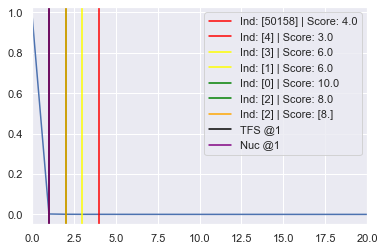

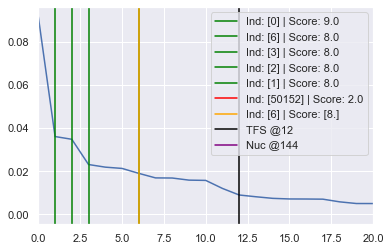

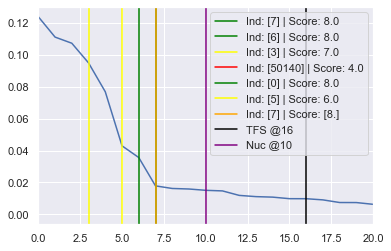

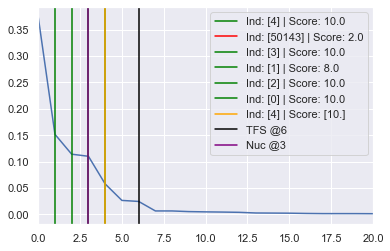

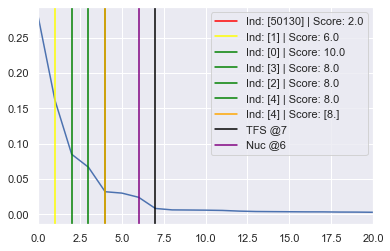

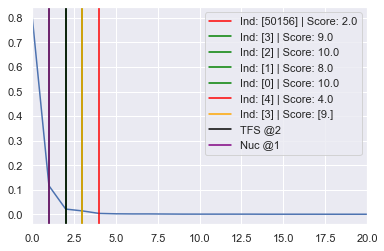

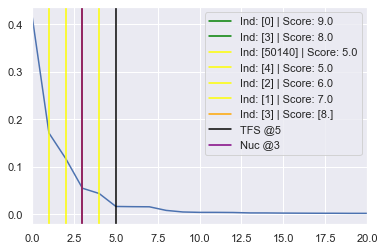

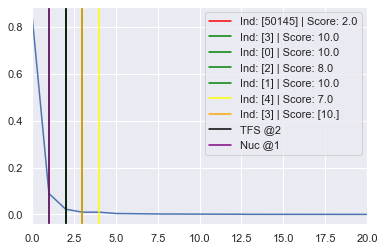

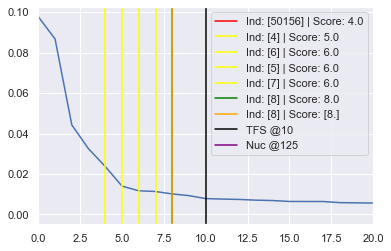

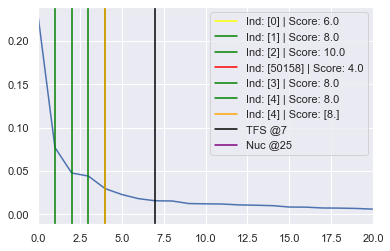

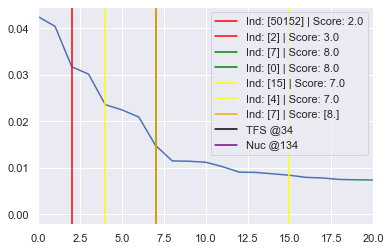

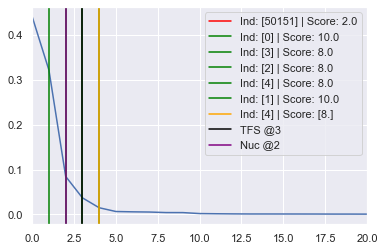

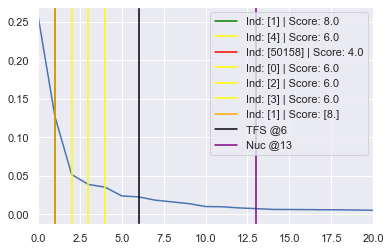

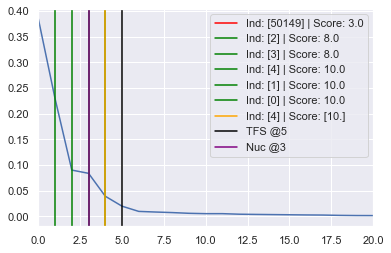

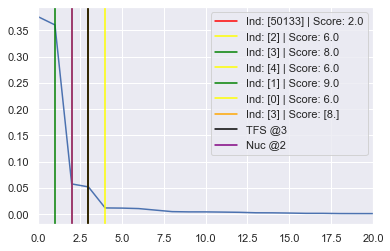

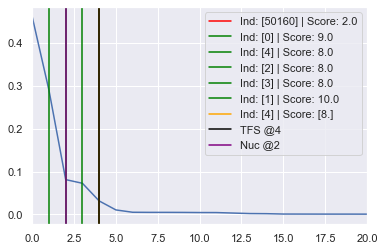

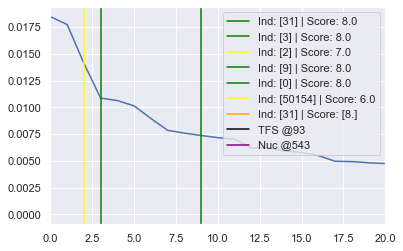

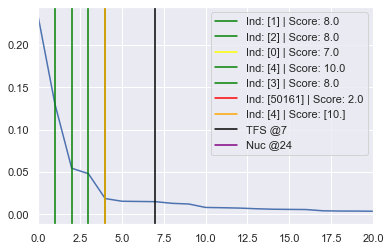

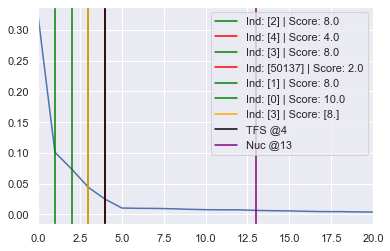

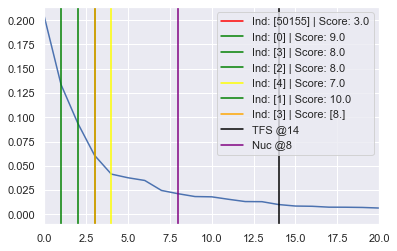

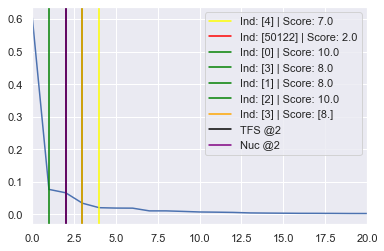

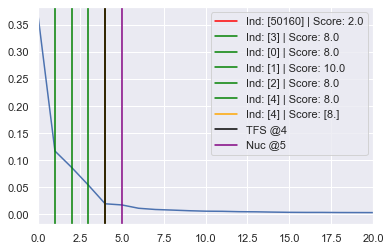

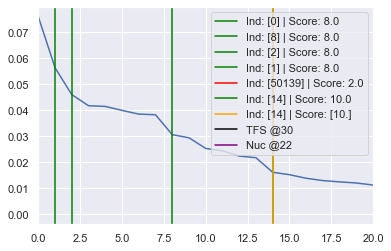

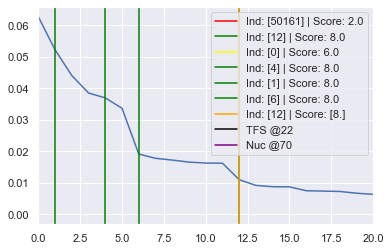

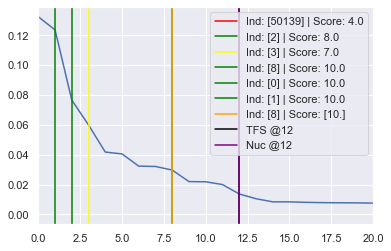

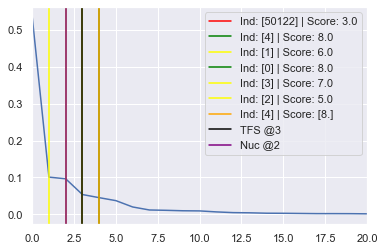

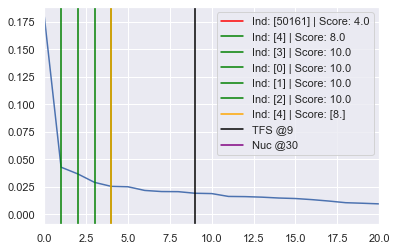

In [106]:
n_ans_ords = []
for m_deets_ind, q_turk in enumerate(meta_deets):
    
    if 8 not in y[m_deets_ind]:
        continue
    
    q_score = y[m_deets_ind]
    q_prob = x[m_deets_ind]
    
    #temp_ans = []
    ind = q_turk[0]
    if q_turk[1] == 1:
        sps_loc = df1.loc[ind, ['batch_ind', 'ind_in_batch', 'time_point'] ]
    elif q_turk[1] == 2:
        sps_loc = df2.loc[ind, ['batch_ind', 'ind_in_batch', 'time_point'] ]
        
    b_ind, ind_in_b,tp = sps_loc['batch_ind'], sps_loc['ind_in_batch'],sps_loc['time_point']
    text_tp = tp + prompt_length+1
    sps = softmax(-np.sort(-all_logits[b_ind][ind_in_b, tp, :]))
    indices = np.argsort(-all_logits[b_ind][ind_in_b, tp, :])
    ground_token = text[b_ind][ind_in_b][text_tp]
    
    plt.plot(np.arange(len(sps)), sps)
    plt.xlim([0,20])
    
    for prob, score in zip(q_prob, q_score):
        sps_ind = np.where(sps==prob)[0]
        if len(sps_ind)>0:
            if score>=8:
                
                plt.axvline(sps_ind, color='green', label='Ind: '+str(sps_ind)+' | Score: '+str(score))
            elif score >=5:
                plt.axvline(sps_ind, color='yellow', label='Ind: '+str(sps_ind)+' | Score: '+str(score))
            else:
                plt.axvline(sps_ind, color='red', label='Ind: '+str(sps_ind)+' | Score: '+str(score))
                

    eight_inds = np.where(q_score>=8)[0]
    min_eight_prob = np.min(q_prob[eight_inds])
    min_eight_score = q_score[np.where(q_prob==min_eight_prob)[0]]
    sps_ind = np.where(sps==min_eight_prob)[0]
    if len(sps_ind)>0:
        plt.axvline(sps_ind, color='orange', label='Ind: '+str(sps_ind)+' | Score: '+str(min_eight_score))
    
    # plot where TFS and Nuc would go. Overall this looks v promising!
    
    first = sps[1:] - sps[:-1]
    second = first[1:] - first[:-1]
    tail_id = new_tfs(second, 0.9)
    plt.axvline(tail_id, color='black', label='TFS @' + str(tail_id))
    tail_id = nucleus_calc(sps, 0.63)
    plt.axvline(tail_id, color='purple', label='Nuc @' +str(tail_id))
    
    plt.legend()
        
    plt.show()
        
    
            

In [ ]:
#TFS looks closer and doesn't have to be tuned to this. 

# Want to plot how each of the different scores given correspond to the probabilities. 

# Fixing answer orders for the first batch. 
Need to update the probabities for the ground words. 


In [48]:
g_truth = pickle.load(open('MTURK_FIRST_GROUNDWORDS_prob_slice_replaceable_comparisons_answers_list.pickle','rb'))
all_gwords = []
for q in g_truth: 
    for e in q:
        if e[2]==1:
            all_gwords.append(e[0])

In [52]:
df = pd.read_csv('MTURK_FIRST_backup_of_different_prob_slices.csv')

In [54]:
df.head()

,Unnamed: 0,prompt_ind,time_point,batch_ind,ind_in_batch,leading_words,ground_word,ground_word_prob,words,abs_inds,probs
0,0,19,28,0,19,"change something, might be the one trigger th...",events,4.103564e-07,['events' 'event' 'things' 'circumstances' 'ba...,"[0, 1, 2, 3, 4, 50158]","[0.9782679, 0.0021306623, 0.00077810284, 0.000..."
1,1,72,100,3,2,the world ’ s leading pharmaceutical companie...,would,5.513494e-05,['were' 'had' 'would' 'could' 'are' 'iterator'],"[0, 3, 5, 6, 7, 50140]","[0.123787306, 0.09488712, 0.04294153, 0.035621..."
2,2,31,29,1,8,off guard. While your body lay half on the co...,edge,1.622044e-06,['edge' 'counter' 'sink' 'side' 'table' 'Plot'],"[0, 1, 2, 3, 4, 50130]","[0.27985963, 0.1617055, 0.08516163, 0.06683456..."
3,3,56,73,2,10,I'm getting rrREAdy''. My murmur had ended with,a,5.716932e-05,['a' 'the' 'my' 'an' 'me' 'conservancy'],"[0, 1, 2, 3, 4, 50140]","[0.41619945, 0.17138307, 0.11777301, 0.0551321..."
4,4,24,60,1,1,crunched underneath and the ground bubbled wi...,creek,2.153896e-08,['and' 'of' 'oak' 'sand' 'sky' 'Eat'],"[4, 5, 6, 7, 8, 50156]","[0.023683885, 0.013982991, 0.011684752, 0.0113..."


In [49]:
all_gwords

[' events',
 ' would',
 ' edge',
 ' a',
 ' creek',
 ' is',
 ' adept',
 ' shock',
 ' the',
 ' novel',
 ' secretaries',
 ' technology',
 ' Jews',
 ' trade',
 ' his',
 ' his',
 ' told',
 ' smile',
 ' we']

In [55]:
batch_size=25
num_batches=4
prompt_length=100
generated_length=150
tot_len = prompt_length+generated_length

import encoder
from decodeLogits import *
model_name='774M' #345M
models_dir='../gpt-2/models'
enc = encoder.get_encoder(model_name, models_dir)

prompts=pd.read_csv('test_dataframe_500primer.csv')

In [56]:
gpt_out_path = 'gpt-2_output/'
additional_path = '-model_774M-seed_27'#'' 
#all_perps = pickle.load( gzip.open(gpt_out_path+'all_perplexities_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb'))
all_logits = pickle.load( gzip.open(gpt_out_path+'all_logits_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb')) # needed to get the probabilities
text = pickle.load( gzip.open(gpt_out_path+'all_text_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb'))

In [ ]:
'event', 0.0021306623239070177, 0),
  ('things', 0.0007781028398312628, 0),
  ('bad', 0.0004916115431115031, 0),
  (' events', 2.2686589e-08, 1),
  ('circumstances', 0.0005090322229079902, 0),
  ('events', 0.9782679080963135, 0),
  ('Population', 7.025027803399253e-13, 0)],

In [59]:
answer_orders

[[('event', 0.0021306623239070177),
  ('things', 0.0007781028398312628),
  ('bad', 0.0004916115431115031),
  (' events', 4.1035644926523673e-07),
  ('circumstances', 0.0005090322229079902),
  ('events', 0.9782679080963135),
  ('Population', 7.025027803399253e-13)],
 [('iterator', 1.5726539862037647e-11),
  (' would', 5.5134936701506376e-05),
  ('would', 0.04294152930378914),
  ('are', 0.01786944642663002),
  ('could', 0.03562188893556595),
  ('had', 0.09488712251186371),
  ('were', 0.1237873062491417)],
 [('sink', 0.08516162633895874),
  ('table', 0.03213869407773018),
  ('Plot', 1.6408815278756705e-11),
  ('counter', 0.16170549392700195),
  ('edge', 0.27985963225364685),
  ('side', 0.06683456152677536),
  (' edge', 1.6220442375924904e-06)],
 [('a', 0.4161994457244873),
  ('the', 0.1713830679655075),
  ('me', 0.044027868658304214),
  (' a', 5.716932355426252e-05),
  ('conservancy', 2.3627343137544443e-11),
  ('an', 0.0551321804523468),
  ('my', 0.11777301132678986)],
 [('and', 0.023683

In [62]:
n_ans_ords = []
for ind, ans in enumerate(answer_orders):
    temp_ans = []
    for tup in ans: 
        if tup[0] in all_gwords: 
            
            sps_loc = df.loc[ind, ['batch_ind', 'ind_in_batch', 'time_point'] ]
            b_ind, ind_in_b,tp = sps_loc['batch_ind'], sps_loc['ind_in_batch'],sps_loc['time_point']
            print(tp)
            text_tp = tp + prompt_length+1
            sps_no_sort = softmax(all_logits[b_ind][ind_in_b, tp, :])
            ground_token = text[b_ind][ind_in_b][text_tp]
            
            temp_ans.append((tup[0], sps_no_sort[ground_token], 1))
            
        else: 
            temp_ans.append((tup[0], tup[1], 0))
            
    n_ans_ords.append(temp_ans)
        
            # get the sps at this point and fix the prob. 
n_ans_ords            
            
            

28
100
29
73
60
64
108
53
28
46
100
114
24
45
2


[[('event', 0.0021306623239070177, 0),
  ('things', 0.0007781028398312628, 0),
  ('bad', 0.0004916115431115031, 0),
  (' events', 0.97826886, 1),
  ('circumstances', 0.0005090322229079902, 0),
  ('events', 0.9782679080963135, 0),
  ('Population', 7.025027803399253e-13, 0)],
 [('iterator', 1.5726539862037647e-11, 0),
  (' would', 0.04294153, 1),
  ('would', 0.04294152930378914, 0),
  ('are', 0.01786944642663002, 0),
  ('could', 0.03562188893556595, 0),
  ('had', 0.09488712251186371, 0),
  ('were', 0.1237873062491417, 0)],
 [('sink', 0.08516162633895874, 0),
  ('table', 0.03213869407773018, 0),
  ('Plot', 1.6408815278756705e-11, 0),
  ('counter', 0.16170549392700195, 0),
  ('edge', 0.27985963225364685, 0),
  ('side', 0.06683456152677536, 0),
  (' edge', 0.27985963, 1)],
 [('a', 0.4161994457244873, 0),
  ('the', 0.1713830679655075, 0),
  ('me', 0.044027868658304214, 0),
  (' a', 0.41619945, 1),
  ('conservancy', 2.3627343137544443e-11, 0),
  ('an', 0.0551321804523468, 0),
  ('my', 0.11777

In [63]:




pickle.dump(n_ans_ords, open( 'MTURK_FIRST_updated_answers_list.pickle' ,'wb'))